# Context and Defining Problem Statement

The data we have at hand is of passengers and their feedback regarding their flight experience. 

Each row is one passenger. Apart from the  feedback from the customers accross various attributes(15 in total) like food, online_support, cleanliness etc, we have data about the customers' age, loyalty to the airline, gender and class.

The target column is a binary variable which tells us if the customer is satisfied or neutral/dissatisfied

The task at hand is to analyze the data and build a model to predict customer satisfaction using all or some of the data we have.

# Steps - 
- Data loading and preprocessing
- Exploratory Data Analysis
- Model building and evaluation
- Model Tuning
- Implementing the process through Pipeline

# Data loading and preprocessing

### 1. Import Pandas, Numpy, pyplot and seaborn

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,classification_report

warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
os.chdir("D:/training/greatlearnings/supervisedlearning/featureeng/week2/")

### 2. Import the dataframes that are needed
- Import "Flight data_Train.csv" and "Surveydata_Train.csv"

In [3]:
df1 = pd.read_csv("Flight_data.csv")  # Read the data regarding customer attributes
df2 = pd.read_csv("Survey_data.csv")   # Feedback data from customers

In [4]:
df1.head()

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0


In [5]:
df2.head()

,Id,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,acceptable,poor,need improvement,need improvement,poor
1,193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,acceptable,excellent,acceptable,excellent,acceptable
2,174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,good,need improvement,excellent,need improvement,excellent
3,191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,good,poor,acceptable,acceptable,poor
4,221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,good,good,excellent,good,good


### 3. Join the two dataframes using the 'id' column as the primary key
- Rename the Id column of one dataframe so that there "id" column name becomes same

In [6]:
#Using pandas' Join method
#c = a.join(b)  # Joining two dfs on the 'Id' column

df = df2.set_index("Id").join(df1.set_index("ID"))


print(df.shape)
df.head()  # the combined dataframe

(90917, 23)


,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,...,need improvement,poor,Male,Loyal Customer,30,Business travel,Business,1354,11,8.0
193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,...,excellent,acceptable,Female,disloyal Customer,20,NaN,Business,1439,6,0.0
174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,...,need improvement,excellent,Female,NaN,55,Personal Travel,Eco Plus,976,4,0.0
191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,...,acceptable,poor,Male,disloyal Customer,24,Business travel,Eco,2291,0,0.0
221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,...,good,good,Male,Loyal Customer,32,Business travel,Business,3974,0,0.0


In [7]:
df.Satisfaction.value_counts()

satisfied                  49761
neutral or dissatisfied    41156
Name: Satisfaction, dtype: int64

### 4. Print the number of missing values in each of the columns

In [8]:
df.isna().sum() # Since True is 1 and False is 0, if you do a sum of a boolean dataframe, we get the number of trues in each col

Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
dtype: int64

In [9]:
# you can also find it using the snippet below
df.isnull().apply(pd.value_counts)  

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
False,90917.0,90917.0,82673,82736,90917.0,90917.0,90917.0,90917.0,90917.0,83738,...,90917.0,90917.0,90917.0,81818,90917.0,81829,90917.0,90917.0,90917.0,90633
True,NaN,NaN,8244,8181,NaN,NaN,NaN,NaN,NaN,7179,...,NaN,NaN,NaN,9099,NaN,9088,NaN,NaN,NaN,284


### 5. Drop all the rows having atleast one missing values and check the shape of the dataframe before and after dropping the rows
- Fill null values in ArrivalDelayin_Mins with mean
- After that drop all the rows with null values

In [10]:
# There are a few columns where out of the total ~90k records, ~8k have missing value. Imputing them with a central tendency
# might add undesirable noise in the data. Hence, lets tackle only the columns that have less missing values.

# But before imputation let us check the distribution of the data. If there are outliers, we would prefer to impute with median
# else mean can be good option.


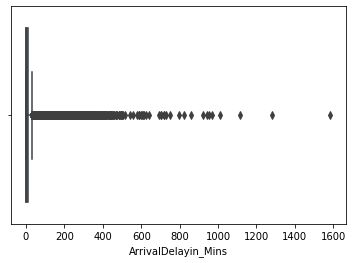

In [11]:
sns.boxplot(df['ArrivalDelayin_Mins'])

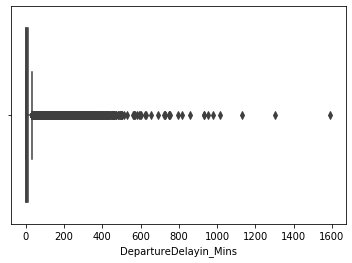

In [12]:
sns.boxplot(df['DepartureDelayin_Mins'])

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,90917.0,39.447166,15.129794,7.0,27.0,40.0,51.0,85.0
Flight_Distance,90917.0,1981.629442,1026.779932,50.0,1360.0,1927.0,2542.0,6950.0
DepartureDelayin_Mins,90917.0,14.686593,38.669260,0.0,0.0,0.0,12.0,1592.0
ArrivalDelayin_Mins,90633.0,15.058930,39.038523,0.0,0.0,0.0,13.0,1584.0


In [14]:
# the above two analysis suggest that we are in for many outliers
# so let us use the median to impute the values
df.ArrivalDelayin_Mins.fillna(df.ArrivalDelayin_Mins.median(), inplace = True)
# Alternate way - You can use the simpleimputer function of the sklearn.impute. You can try it out!
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') 
# df['ArrivalDelayin_Mins'] = imputer.fit_transform(df['ArrivalDelayin_Mins'].values.reshape(-1,1))

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median') 
df['ArrivalDelayin_Mins'] = imputer.fit_transform(df['ArrivalDelayin_Mins'].values.reshape(-1,1))

In [16]:
df.isna().sum()

Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                     0
dtype: int64

In [17]:
# Rest other missing values are filled with not_captured.
#It can be done in other way also or also can be dropped according to the problem and business context.
df.dropna(inplace = True) 

In [18]:
df.fillna("not_captured",inplace = True) 

In [19]:
print(df.shape)

(53798, 23)


# Exploratory Data Analysis

### 6. Print correlation

In [20]:
cor = df.corr() # It will show correlation of only numerical variables here.

In [21]:
cor

,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Age,1.000000,-0.250969,-0.009865,-0.010919
Flight_Distance,-0.250969,1.000000,0.110827,0.108107
DepartureDelayin_Mins,-0.009865,0.110827,1.000000,0.962182
ArrivalDelayin_Mins,-0.010919,0.108107,0.962182,1.000000


- There is just one obvious correlation that we can see that is between arrival delay and departure delay. We can drop one of the variables here

In [22]:
to_drop = ['DepartureDelayin_Mins']

### Feedback columns
Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding'

### 7. Manually encode these variables(printed above) such that they follow an order based on the meaning. 

In [23]:
# Manual label encoding
df.replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3, 
            'good' : 4, 'excellent' : 5}, inplace = True)  

df.replace({'very inconvinient' : 0, 'Inconvinient' : 1, 'need improvement' : 2, 'manageable' : 3,
            'Convinient' : 4, 'very convinient' : 5}, inplace = True)

In [24]:
# check for encodings
df['Departure.Arrival.time_convenient'].value_counts()

4    12166
5    11123
3     9656
2     9554
1     8559
0     2740
Name: Departure.Arrival.time_convenient, dtype: int64

### 8. Display countplot of every feedback attribute with respect to Customer Satisfaction. 

You can use sns.countplot and set hue  = 'Satisfaction'

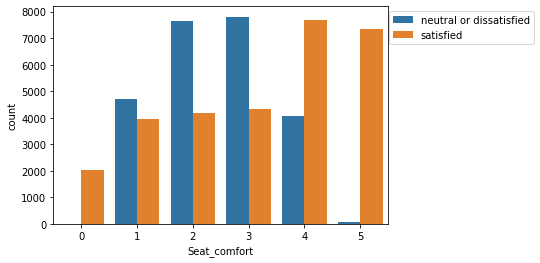

In [25]:
# We can use seaborn's countplot to plot a stacked baatchart
sns.countplot(df.Seat_comfort, hue = df.Satisfaction) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1))   # to place the legend in a 'good' position

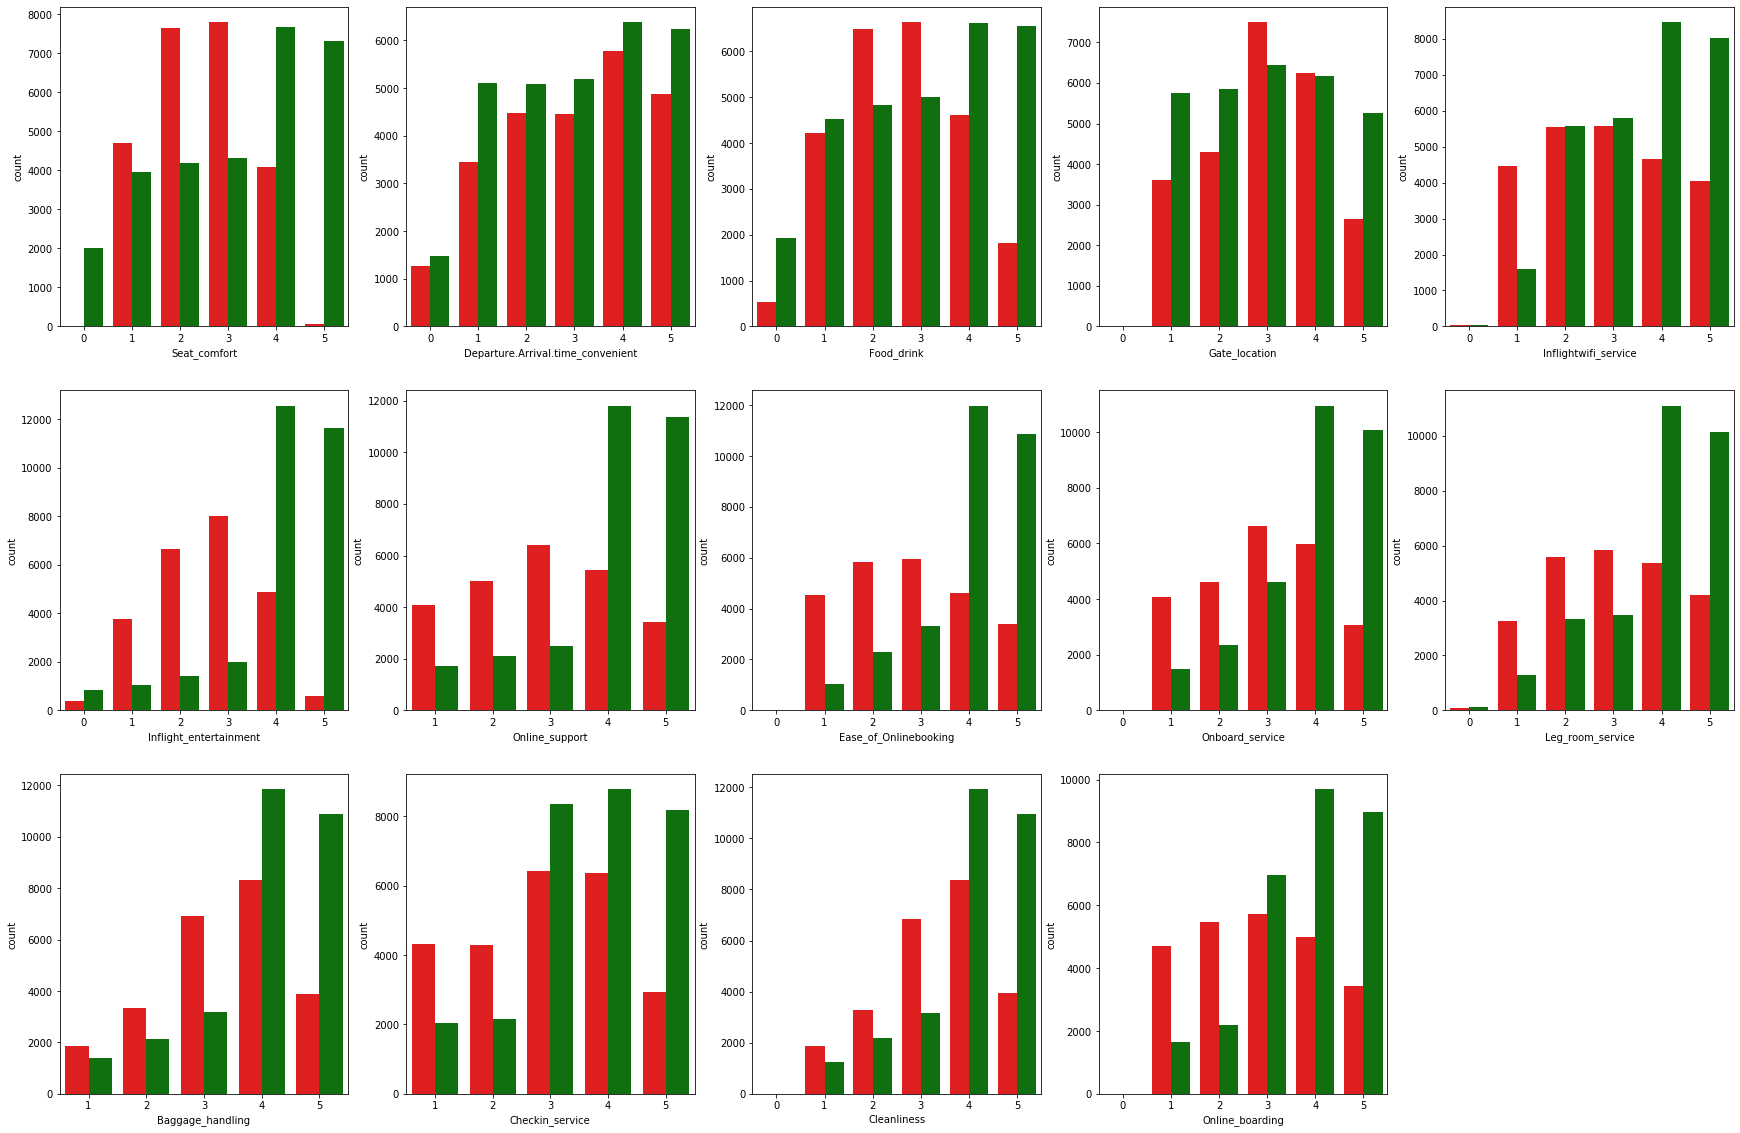

In [26]:
# Since there are a lot of columns that we want to plot, we can put all of them in one plot by using subplot()
# Additionally, since there are a lot of subplots that need to be plotted, we can use a for loop

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(df[i], hue = df.Satisfaction,
                  palette = {'satisfied':'green','neutral or dissatisfied': 'red'})
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   

### 9. Draw all the insights that you can from the plots

**Green and orange bars are counts of satisfied and dissatisfied customers respectively. We want to look for areas where there is a visually significant difference between the length of the stacked bars**

- From the plots above,
    - Seating comfort can cause high levels of satisfaction to customers. Hardly any people who rated highly for seat_comfort were dissatisfied
    - A similar case with respect to inflight_entertainment. In this case, having less entertainment seems to have caused far more dissatisfaction compared to bad seating.
    - Difference is observed in ease_of_online_booking quiet evidently

### 10. Print the average feedback score
- When Satisfaction columns equals 'satisfied'
- When Satisfaction columns is not equal to 'satisfied'

In [27]:
Feedback_cols = ['Seat_comfort', 'Departure.Arrival.time_convenient',
                 'Food_drink', 'Gate_location', 'Inflightwifi_service',
                 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 
                 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service',
                 'Cleanliness', 'Online_boarding']

In [28]:
df.groupby('Satisfaction').mean() # Average rating of individual feedback attributes across satisfaction levels


,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,2.469468,3.015667,2.659690,3.000864,2.922571,2.61820,2.963691,2.855216,2.972573,3.061598,3.370040,2.971504,3.380484,2.875529,37.451334,2028.216251,18.005181,18.562400
satisfied,3.142271,2.970793,3.001153,2.977238,3.530004,4.01557,3.983751,3.996981,3.875912,3.852641,3.972896,3.641100,3.985651,3.750161,41.018590,1943.874894,12.120052,12.241256


### 11. Draw any insights that you can from the above values

- Observe the Exreme values (lower side for 'dissatisfaction' and higher side for 'satisfaction')
- Bad seats are a strong cause for customer dissatisfication
- Time convenience doesn't seem to be that big of a deal
- Dissatisfied customers had some bad experiences with food but average food seems to satisfy most people
- Gate location is totally irrelevant
- Wifi is quiet a factor. On an average, having good wifi yeilded customer satisfaction
- Easy online booking facility seems to be very important for customer satisfaction
- In flight entertainment seems to be a deal breaker

### 12. Create a new column which is the mean of 'Ease_of_Onlinebooking', 'Online_boarding', 'Online_support' and name it "avg_feedback_of_online_services". 

DIY : If online services has a bad ratings then what is the average ratings of other feedback attributes? 
And how does it impact Final Satisfaction of customers?

In [29]:
online_df = df.loc[:, ['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']]
online_df['avg_feedback_of_online_services'] = online_df.mean(axis = 1)

online_df['avg_feedback_of_online_services'].value_counts()


4.000000    10898
3.000000     7105
5.000000     6522
4.333333     5457
2.000000     5335
3.666667     3799
1.000000     3705
4.666667     3470
3.333333     2565
2.666667     2128
2.333333     1886
1.666667      685
1.333333      241
0.666667        2
Name: avg_feedback_of_online_services, dtype: int64

# Model building and evaluation

### 14. Encode the columns "Gender", "CustomerType", "TypeTravel", "Class", "Satisfaction" 
- Use manual encoding or other type of encoding

In [30]:
# Number of classes in each of the categorical attributes
for i in df.columns:
    if df[i].dtype == 'O':
        print(i, '->', len(df[i].value_counts()))

Satisfaction -> 2
Gender -> 2
CustomerType -> 2
TypeTravel -> 2
Class -> 3


In [31]:
df['CustomerType'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [32]:
df.Class.value_counts()

Business    25718
Eco         24156
Eco Plus     3924
Name: Class, dtype: int64

In [33]:
#Manuanl Encoding
df.replace({'Loyal Customer' : 1, 'disloyal Customer' : 0,'not_captured':3,
               'Business travel' : 1, 'Personal Travel' : 0,
              'Female' : 0, 'Male' : 1,
               'satisfied' : 1, 'neutral or dissatisfied' : 0, 'Eco Plus': 0 , 'Eco': 1, 'Business': 2}, inplace = True)
               

In [34]:
df['CustomerType'].unique()

array([1, 0], dtype=int64)

In [35]:
#onehotencoding
df_coded = pd.get_dummies(df.drop(['Satisfaction'],axis = 1),drop_first=True)

In [36]:
df_coded

,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,1,3,3,3,1,2,1,1,3,3,...,2,1,1,1,30,1,2,1354,11,8.0
191830,4,4,4,3,1,4,1,1,1,4,...,3,1,1,0,24,1,1,2291,0,0.0
228137,5,5,5,5,3,5,5,4,4,5,...,4,3,1,1,47,1,2,657,0,0.0
240081,1,1,1,1,5,5,5,4,2,4,...,3,5,0,1,30,1,2,5342,140,125.0
233692,1,1,1,1,2,5,5,5,5,5,...,5,3,1,1,58,1,2,351,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240287,5,5,5,5,5,4,5,5,5,5,...,5,4,1,1,78,1,2,2741,0,0.0
177814,5,5,5,3,3,5,4,4,4,5,...,4,3,0,1,67,0,1,306,2,0.0
181405,2,0,2,4,3,2,3,3,4,2,...,4,3,0,0,25,1,2,2070,0,0.0


In [37]:
df_coded.columns

Index(['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding', 'Gender', 'CustomerType', 'Age',
       'TypeTravel', 'Class', 'Flight_Distance', 'DepartureDelayin_Mins',
       'ArrivalDelayin_Mins'],
      dtype='object')

In [38]:
df_coded.head()

,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,1,3,3,3,1,2,1,1,3,3,...,2,1,1,1,30,1,2,1354,11,8.0
191830,4,4,4,3,1,4,1,1,1,4,...,3,1,1,0,24,1,1,2291,0,0.0
228137,5,5,5,5,3,5,5,4,4,5,...,4,3,1,1,47,1,2,657,0,0.0
240081,1,1,1,1,5,5,5,4,2,4,...,3,5,0,1,30,1,2,5342,140,125.0
233692,1,1,1,1,2,5,5,5,5,5,...,5,3,1,1,58,1,2,351,0,0.0


In [39]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Satisfaction,53798.0,0.547957,0.497699,0.0,0.0,1.0,1.0,1.0
Seat_comfort,53798.0,2.838135,1.394441,0.0,2.0,3.0,4.0,5.0
Departure.Arrival.time_convenient,53798.0,2.991078,1.524952,0.0,2.0,3.0,4.0,5.0
Food_drink,53798.0,2.846797,1.443158,0.0,2.0,3.0,4.0,5.0
Gate_location,53798.0,2.987918,1.305901,0.0,2.0,3.0,4.0,5.0
Inflightwifi_service,53798.0,3.255418,1.320235,0.0,2.0,3.0,4.0,5.0
Inflight_entertainment,53798.0,3.383899,1.340946,0.0,2.0,4.0,4.0,5.0
Online_support,53798.0,3.522640,1.307606,1.0,3.0,4.0,5.0,5.0
Ease_of_Onlinebooking,53798.0,3.480854,1.305044,0.0,2.0,4.0,5.0,5.0
Onboard_service,53798.0,3.467564,1.270305,0.0,3.0,4.0,4.0,5.0


# Scaling

In [40]:
df_coded.columns


Index(['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding', 'Gender', 'CustomerType', 'Age',
       'TypeTravel', 'Class', 'Flight_Distance', 'DepartureDelayin_Mins',
       'ArrivalDelayin_Mins'],
      dtype='object')

In [41]:
# #Here we are going to use StandardScaler to scale our data.
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# #What all columns to scale? I have preferred all columns except onehotencoded columns and target columns as
# #scaling of target feature will not change anything as they already have values like 0 and 1 only.
# #You may only scale numerical features and leave categorical features as required according to business problem need and results.
# cols_to_scale = ['Seat_comfort', 'Departure.Arrival.time_convenient',
#        'Food_drink', 'Gate_location', 'Inflightwifi_service',
#        'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
#        'Onboard_service', 'Leg_room_service', 'Baggage_handling',
#        'Checkin_service', 'Cleanliness', 'Online_boarding',
#        'Age', 'Flight_Distance','DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

# df_coded[cols_to_scale] = scaler.fit_transform(df_coded[cols_to_scale].to_numpy())

In [42]:
# mean.std 
# x -mean / std

In [43]:
#del df_coded['ArrivalDelayin_Mins']

In [44]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#What all columns to scale? I have preferred all columns except onehotencoded columns and target columns as
#scaling of target feature will not change anything as they already have values like 0 and 1 only.
#You may only scale numerical features and leave categorical features as required according to business problem need and results.
cols_to_scale = ['Age', 'Flight_Distance','DepartureDelayin_Mins']

df_coded[cols_to_scale] = scaler.fit_transform(df_coded[cols_to_scale].to_numpy())

In [45]:
df_coded.describe()

,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
count,53798.000000,53798.000000,53798.000000,53798.000000,53798.000000,53798.000000,53798.000000,53798.000000,53798.000000,53798.000000,...,53798.000000,53798.000000,53798.000000,53798.000000,5.379800e+04,53798.000000,53798.000000,5.379800e+04,5.379800e+04,53798.000000
mean,2.838135,2.991078,2.846797,2.987918,3.255418,3.383899,3.522640,3.480854,3.467564,3.495056,...,3.712090,3.354790,0.489814,0.818451,-5.707852e-17,0.689319,1.405108,2.020660e-17,6.200083e-16,15.098684
std,1.394441,1.524952,1.443158,1.305901,1.320235,1.340946,1.307606,1.305044,1.270305,1.290595,...,1.145766,1.298327,0.499901,0.385476,1.000009e+00,0.462777,0.621998,1.000009e+00,1.000009e+00,39.125482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-2.148191e+00,0.000000,0.000000,-1.879567e+00,-3.810895e-01,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,0.000000,1.000000,-8.223941e-01,0.000000,1.000000,-6.060927e-01,-3.810895e-01,0.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,0.000000,1.000000,3.937368e-02,1.000000,1.000000,-5.302166e-02,-3.810895e-01,0.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,...,5.000000,4.000000,1.000000,1.000000,7.685618e-01,1.000000,2.000000,5.428552e-01,-7.168788e-02,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1.000000,1.000000,3.022416e+00,1.000000,2.000000,4.833169e+00,2.870266e+01,1115.000000


In [46]:
df_coded.head()

,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,1,3,3,3,1,2,1,1,3,3,...,2,1,1,1,-0.623525,1,2,-0.610957,-0.097471,8.0
191830,4,4,4,3,1,4,1,1,1,4,...,3,1,1,0,-1.021264,1,1,0.300613,-0.381089,0.0
228137,5,5,5,5,3,5,5,4,4,5,...,4,3,1,1,0.503402,1,2,-1.289040,-0.381089,0.0
240081,1,1,1,1,5,5,5,4,2,4,...,3,5,0,1,-0.623525,1,2,3.268809,3.228596,125.0
233692,1,1,1,1,2,5,5,5,5,5,...,5,3,1,1,1.232591,1,2,-1.586736,-0.381089,0.0


In [47]:
df_coded['Satisfaction'] = df['Satisfaction']

In [48]:
#df = df_coded

In [49]:
del df_coded['ArrivalDelayin_Mins']

### 15. Seperate the column "Satisfaction" from the rest of the columns
- Create X and y

In [50]:
#We are going to drop highly correlated feature which we have found before as there features might affect our models.
to_drop 

['DepartureDelayin_Mins']

In [51]:
X = df_coded.drop(columns= ['Satisfaction'])  # Seperating the target and the rest
#X = df.drop(columns= ['Satisfaction'])
y = df_coded.Satisfaction

### 16. Create train and test datasets
- Use train_test_split

In [52]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y)

In [53]:
y_train.value_counts()

1    22109
0    18239
Name: Satisfaction, dtype: int64

In [54]:
y_test.value_counts()

1    7370
0    6080
Name: Satisfaction, dtype: int64

In [55]:
X_train.dtypes

Seat_comfort                           int64
Departure.Arrival.time_convenient      int64
Food_drink                             int64
Gate_location                          int64
Inflightwifi_service                   int64
Inflight_entertainment                 int64
Online_support                         int64
Ease_of_Onlinebooking                  int64
Onboard_service                        int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online_boarding                        int64
Gender                                 int64
CustomerType                           int64
Age                                  float64
TypeTravel                             int64
Class                                  int64
Flight_Distance                      float64
DepartureDelayin_Mins                float64
dtype: object

### 17. Print accuracy
- Print accuracy on test data using below models
- Logistic regression model trained using all the attributes
- Logistic regression model trained using only the feedback columns
- Decision tree model trained using all the attributes
- Random forest model trained using all the attributes

Logistic Regression

In [56]:
#Logistic Regression with only feedback columns
from sklearn.linear_model import LogisticRegression #importing logistic regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from logistic regression
score1 = lr.score(X_test, y_test)
score1

0.8354646840148698

Predicting customer satisfaction solely based on the feedback

In [57]:
feedback

['Seat_comfort',
 'Departure.Arrival.time_convenient',
 'Food_drink',
 'Gate_location',
 'Inflightwifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Onlinebooking',
 'Onboard_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [58]:
# #Logistic Regression with only feedback columns
# X_train, X_test, y_train, y_test = train_test_split(X.loc[:,feedback], y, random_state = 1, stratify = y)

# lr = LogisticRegression()

# lr.fit(X_train, y_train)

# pred = lr.predict(X_test)

# score2 = lr.score(X_test, y_test)

# print(f'Number of features used = {len(X_train.columns)}')
# print(f'Accuracy in predicting customer satisfaction solely based on the feedback = {score2}')

L1 regularization technique is called Lasso  
L2 is called Ridge 

The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In [59]:
#LogisticRegression()

In [60]:
#[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110] 

In [65]:
%%time
np.random.seed(3)
parameters = {'penalty': ['l1','l2','elasticnet'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg_t = GridSearchCV(LogisticRegression(), parameters, cv = 5, verbose = 2, n_jobs= 4)
lg_t.fit(X_train, y_train)
lg_t.best_params_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   20.6s finished


Wall time: 21.2 s


{'penalty': 'l2', 'solver': 'liblinear'}

In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      6080
           1       0.85      0.85      0.85      7370

    accuracy                           0.84     13450
   macro avg       0.83      0.83      0.83     13450
weighted avg       0.84      0.84      0.84     13450



### Support vector machines

In [67]:
%%time
from sklearn.svm import SVC 

np.random.seed(3)
parameters = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1], 
              'kernel': ['rbf']}  
svc_grid = GridSearchCV(SVC(), parameters, cv = 5, verbose = 2, n_jobs= 4)
svc_grid.fit(X_train, y_train)

svc_grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 21.0min finished


Wall time: 22min 8s


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [68]:
pred = svc_grid.predict(X_test)

score2 = svc_grid.score(X_test, y_test)
print(f'Number of features used = {len(X_train.columns)}')
print(f'Accuracy in predicting customer satisfaction solely based on the feedback = {score2}')

Number of features used = 21
Accuracy in predicting customer satisfaction solely based on the feedback = 0.9462453531598513


Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.9302602230483271


In [70]:
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6022
           1       0.94      0.94      0.94      7428

    accuracy                           0.93     13450
   macro avg       0.93      0.93      0.93     13450
weighted avg       0.93      0.93      0.93     13450



In [71]:
#https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85


Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score4 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.9528624535315985


In [73]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6022
           1       0.96      0.95      0.96      7428

    accuracy                           0.95     13450
   macro avg       0.95      0.95      0.95     13450
weighted avg       0.95      0.95      0.95     13450



### 18. Print feature importance
- Print feature importance of Random Forest



In [74]:
#Decision Tree 
pd.Series(dt.feature_importances_, X_train.columns ).sort_values(ascending= False)

Inflight_entertainment               0.387219
Seat_comfort                         0.179765
Ease_of_Onlinebooking                0.068838
CustomerType                         0.049825
TypeTravel                           0.037316
Flight_Distance                      0.033089
Age                                  0.026833
Class                                0.023229
Gate_location                        0.021353
Departure.Arrival.time_convenient    0.020988
Online_support                       0.020147
Checkin_service                      0.017297
DepartureDelayin_Mins                0.017192
Gender                               0.016014
Leg_room_service                     0.015541
Baggage_handling                     0.014727
Cleanliness                          0.014540
Onboard_service                      0.011888
Online_boarding                      0.009333
Inflightwifi_service                 0.008216
Food_drink                           0.006652
dtype: float64

In [75]:
#RandomForest
pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending= False)
## Alternate Way
##pd.DataFrame({'Attribute': X_train.columns, 'Importance': rf.feature_importances_}) 

Inflight_entertainment               0.200150
Seat_comfort                         0.128360
Ease_of_Onlinebooking                0.084824
Online_support                       0.065862
Onboard_service                      0.044076
CustomerType                         0.042991
Food_drink                           0.040033
Flight_Distance                      0.038722
Leg_room_service                     0.038564
Class                                0.034881
Age                                  0.033446
Online_boarding                      0.031942
Gender                               0.031314
Cleanliness                          0.027812
TypeTravel                           0.026398
Checkin_service                      0.025070
Baggage_handling                     0.024113
Departure.Arrival.time_convenient    0.023619
Gate_location                        0.019992
DepartureDelayin_Mins                0.019729
Inflightwifi_service                 0.018102
dtype: float64

# Model Tuning

### 19. Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**



Cross Validation Score

In [49]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score5 = cross_val_score(dt, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score5}')

Cross validation score of Decision tree = 0.9357409995224442


In [50]:
#Random Forest rf
score6 = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score6}')

Cross validation score of Random forest = 0.9541990088123231


Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_


# Best parameters
#{'bootstrap': True,
# 'max_depth': 30,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 1,
#  'n_estimators': 100} 


NameError: name 'RandomForestClassifier' is not defined

In [237]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10,],
 'max_features': ['auto']}


clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_


# Best parameters
#{'bootstrap': True,
# 'max_depth': 30,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 1,
#  'n_estimators': 100} 


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   40.8s finished


{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto'}

In [52]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 30,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)
score7 = cross_val_score(rf, X, y, cv = 5).mean()
score7

0.9526375791202387

In [53]:
data = {'Technique' : ['Logistic Regression', "LR with only feedback columns ", 'Decision tree',
                       'Random forest', 'DT CV','RF CV','Tuned RF CV'],
       'Score' : [score1, score2, score3, score4, score5, score6, score7] }

result = pd.DataFrame(data)

In [54]:
result

,Technique,Score
0,Logistic Regression,0.835985
1,LR with only feedback columns,0.805056
2,Decision tree,0.931524
3,Random forest,0.953011
4,DT CV,0.935741
5,RF CV,0.954199
6,Tuned RF CV,0.952638


# Pipeline - Automate and Simplify the process

In [56]:
#!pip install category_encoders

In [238]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder



numeric_features = ['Age', 'Flight_Distance', 'DepartureDelayin_Mins'
       ]

feedback_features = ['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding']

other_cat_cols =  ['Gender', 'CustomerType', 'TypeTravel', 'Class']


#TRANSFORMERS



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


feedback_feature_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('label_encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])


other_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('feed_col', feedback_feature_transformer, feedback_features),
        ('other_cat_col', other_cat_transformer, other_cat_cols )
    ])

In [239]:
#Adding into Pipeline
clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf)])

In [240]:
#Taking the raw data
data = df2.set_index("Id").join(df1.set_index("ID"))


In [241]:
#Getting X and y
X_pipe = data.drop(['Satisfaction', 'ArrivalDelayin_Mins'], axis = 1)
y_pipe = data['Satisfaction']

In [242]:
#Data SPlit
X_trains, X_tests, y_trains, y_tests = train_test_split(X_pipe,y_pipe, stratify = y_pipe)

In [243]:
#Fitting Pipeline 
clf_pipeline.fit(X_trains, y_trains)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   26.9s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight_Distance',
                                                   'DepartureDelayin_Mins']),
                                                 ('feed_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='not_captured',
                                                                                 strategy='constant')),
                                                          

In [244]:
clf_pipeline.score(X_tests, y_tests)

0.9343598768147823

In [63]:
#Getting score 
clf.score(X_tests, y_tests)

0.944170699516058

# Conclusion:

- Given some data, we have seen how to perform EDA for that dataset
- The data that we had was not entirely continuous or categorical. Hence we improvised the analysis to draw insights
- We used the same old bar-charts but the way we interpreted is unique to this problem
- Beyond EDA, we have seen how to preprocess data and train Supervised Models with it
- We finally put all the steps in one place and built a pipeline using the Sklearn's Pipeline function

# Explore:

- You can cluster different segments of customer to get more insights about their behaviours.
- Create new features and select the best features to improve your model further.


In [76]:
import xgboost as xgb
import lightgbm as lgb

In [77]:
df_coded.head()

,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,Satisfaction
Id,,,,,,,,,,,,,,,,,,,,,
198671,1,3,3,3,1,2,1,1,3,3,...,2,1,1,1,-0.623525,1,2,-0.610957,-0.097471,0
191830,4,4,4,3,1,4,1,1,1,4,...,3,1,1,0,-1.021264,1,1,0.300613,-0.381089,1
228137,5,5,5,5,3,5,5,4,4,5,...,4,3,1,1,0.503402,1,2,-1.289040,-0.381089,1
240081,1,1,1,1,5,5,5,4,2,4,...,3,5,0,1,-0.623525,1,2,3.268809,3.228596,1
233692,1,1,1,1,2,5,5,5,5,5,...,5,3,1,1,1.232591,1,2,-1.586736,-0.381089,1


In [78]:
X = df_coded.drop(columns= ['Satisfaction', 'DepartureDelayin_Mins'])  # Seperating the target and the rest
#X = df.drop(columns= ['Satisfaction'])
y = df_coded.Satisfaction

In [79]:
y.shape

(53798,)

In [80]:


from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [81]:
xgb2 = xgb.XGBClassifier(max_depth=7, n_estimators=1200, learning_rate=0.04,objective='binary:logistic',
                         tree_method='auto',random_state=42,colsample_bytree=0.8,subsample=0.85,
                        eval_metric ="logloss",
                        gamma=0.2,reg_alpha=0.4,min_child_weight = 3)

eval_set = [(X_train.values, y_train.values), (X_test.values,y_test.values)]

In [82]:
xgb2.fit(X_train.values, y_train,early_stopping_rounds=30, eval_metric=["logloss"],eval_set=eval_set)


[0]	validation_0-logloss:0.663567	validation_1-logloss:0.663708
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 30 rounds.
[1]	validation_0-logloss:0.637619	validation_1-logloss:0.637912
[2]	validation_0-logloss:0.61287	validation_1-logloss:0.613338
[3]	validation_0-logloss:0.591332	validation_1-logloss:0.591752
[4]	validation_0-logloss:0.570513	validation_1-logloss:0.571012
[5]	validation_0-logloss:0.55083	validation_1-logloss:0.551641
[6]	validation_0-logloss:0.531946	validation_1-logloss:0.53283
[7]	validation_0-logloss:0.514057	validation_1-logloss:0.515127
[8]	validation_0-logloss:0.497523	validation_1-logloss:0.498683
[9]	validation_0-logloss:0.481025	validation_1-logloss:0.482447
[10]	validation_0-logloss:0.466659	validation_1-logloss:0.468198
[11]	validation_0-logloss:0.452584	validation_1-logloss:0.45425
[12]	validation_0-logloss:0.439851	validation_1-logloss:0.441658
[13]

XGBClassifier(colsample_bytree=0.8, eval_metric='logloss', gamma=0.2,
              learning_rate=0.04, max_depth=7, min_child_weight=3,
              n_estimators=1200, random_state=42, reg_alpha=0.4, subsample=0.85,
              tree_method='auto')

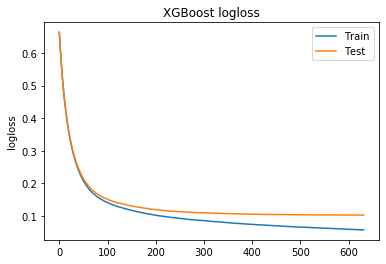

In [83]:
results2 = xgb2.evals_result()
epochs = len(results2['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results2['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results2['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()

## Light GBM

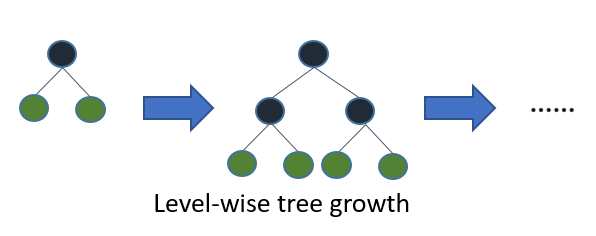





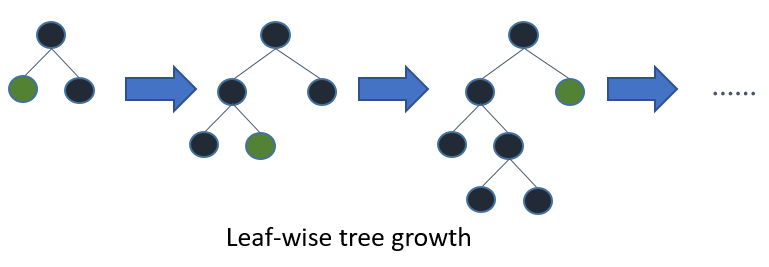

In [84]:
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold


def run_cv_model(train, test, target, model_fn, params={}, eval_fn=None,label='model', n_folds=5):
    kf = StratifiedKFold(n_splits=n_folds, shuffle = True, random_state = 228)
    fold_splits = kf.split(train, target)
    cv_scores = []
    pred_full_test = 0
    pred_train = np.zeros((train.shape[0]))
    feature_importances = pd.DataFrame()
    feature_importances['feature'] = test.columns
    i = 1
    for dev_index, val_index in fold_splits:
        print('-------------------------------------------')
        print('Started ' + label + ' fold ' + str(i) + f'/{n_folds}')
        dev_X, val_X = train.iloc[dev_index], train.iloc[val_index]
        dev_y, val_y = target.iloc[dev_index], target.iloc[val_index]
        params2 = params.copy()
        pred_val_y, pred_test_y, fi,model = model_fn(dev_X, dev_y, val_X, val_y, test, params2)
        feature_importances[f'fold_{i}'] = fi
        pred_full_test = pred_full_test + pred_test_y
        pred_train[val_index] = pred_val_y
        #if eval_fn is not None:
            #cv_score = eval_fn(val_y, pred_val_y)
        try:
            print(val_y.shape)
            print(pred_val_y.shape)
            print('f1 score is {}'.format(f1_score(val_y, pred_val_y, average='micro') ))
            cv_score=f1_score(val_y, pred_val_y, average='micro')
            print('cvscore is {}'.format(cv_score))
            cv_scores.append(cv_score)
            print(label + ' cv score {}: {}'.format(i, cv_score), '\n')
        except:
            print('in loop number {}'.format(i))
            
            break
        i += 1
    print('{} cv scores : {}'.format(label, cv_scores))
    print('{} cv mean score : {}'.format(label, np.mean(cv_scores)))
    print('{} cv std score : {}'.format(label, np.std(cv_scores)))
    pred_full_test = pred_full_test / n_folds
    results = {'label': label,
              'train': pred_train, 'test': pred_full_test,
              'cv': cv_scores, 'fi': feature_importances}
    return results,model

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_class':1,
    'num_leaves': 10,
    'feature_fraction': 0.85,
    'bagging_fraction': 0.95,
    'bagging_freq': 10,
    'learning_rate': 0.03,
    'verbose': 1 }

def labeler(ypr,th = .5):
    ypr2 = np.zeros(len(ypr))
    for i in range(len(ypr)):
        if ypr[i] >= th:
            ypr2[i]=1
        else:  
            ypr2[i]=0
    return ypr2

def lgbmodel(dev_X, dev_y, val_X, val_y, test, params2):
    
    train_data = lgb.Dataset(dev_X, label=dev_y)
    test_data = lgb.Dataset(val_X, label=val_y)

   
    model = lgb.train(parameters,
                           train_data,
                           valid_sets=test_data,
                           num_boost_round=200,
                           early_stopping_rounds=40)
    feature_im = model.feature_importance()
    
    print('Predict 1/2')
    #pred_test_y = model.predict(val_X).argmax(axis=1)
    pred_test_y = model.predict(val_X)
    pred_test_y = labeler(pred_test_y)
    print('len of pred_test_y is {}'.format(pred_test_y.shape))
    print('Predict 2/2')
    #pred_test_y2 = model.predict(test).argmax(axis=1)
    pred_test_y2 = model.predict(test)
    pred_test_y2 = labeler(pred_test_y2)
    print('len of pred_test_y2 is {}'.format(pred_test_y2.shape))
    return pred_test_y, pred_test_y2, feature_im,model


    


In [85]:
n_folds = 10
results,model = run_cv_model(X_train, X_test, y_train, lgbmodel, parameters,f1_score, 'f1', n_folds=n_folds)


-------------------------------------------
Started f1 fold 1/10
[1]	valid_0's binary_logloss: 0.671131
Training until validation scores don't improve for 40 rounds
[2]	valid_0's binary_logloss: 0.655184
[3]	valid_0's binary_logloss: 0.641017
[4]	valid_0's binary_logloss: 0.626443
[5]	valid_0's binary_logloss: 0.612584
[6]	valid_0's binary_logloss: 0.599631
[7]	valid_0's binary_logloss: 0.588025
[8]	valid_0's binary_logloss: 0.576288
[9]	valid_0's binary_logloss: 0.564978
[10]	valid_0's binary_logloss: 0.554434
[11]	valid_0's binary_logloss: 0.54435
[12]	valid_0's binary_logloss: 0.53444
[13]	valid_0's binary_logloss: 0.525224
[14]	valid_0's binary_logloss: 0.514178
[15]	valid_0's binary_logloss: 0.506179
[16]	valid_0's binary_logloss: 0.497861
[17]	valid_0's binary_logloss: 0.49002
[18]	valid_0's binary_logloss: 0.483003
[19]	valid_0's binary_logloss: 0.473812
[20]	valid_0's binary_logloss: 0.466906
[21]	valid_0's binary_logloss: 0.459953
[22]	valid_0's binary_logloss: 0.453479
[23]	v

In [87]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


In [88]:
X_train.head()

,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance
Id,,,,,,,,,,,,,,,,,,,,
184063,2,2,2,4,5,2,1,5,3,2,5,1,2,5,1,0,-0.888684,1,1,-0.384281
158927,3,3,3,3,4,5,4,4,4,4,4,4,4,4,0,1,0.238243,0,2,-1.624677
194079,5,5,5,3,2,5,2,2,4,3,4,5,5,2,1,0,-0.623525,1,2,-0.137174
195618,0,4,0,4,2,4,4,1,1,1,1,3,1,3,1,1,1.166301,1,2,0.398872
235462,1,1,5,1,2,5,4,5,5,5,5,3,5,4,1,1,1.100011,1,2,1.471937


In [89]:
cat_features = [0,1,2,3,4,5]

In [90]:

clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'learning_rate': 0.1, 'iterations': 5}


In [92]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4266023	test: 0.4277347	best: 0.4277347 (0)	total: 119ms	remaining: 5.86s
1:	learn: 0.3182924	test: 0.3173556	best: 0.3173556 (1)	total: 179ms	remaining: 4.3s
2:	learn: 0.2474675	test: 0.2489213	best: 0.2489213 (2)	total: 232ms	remaining: 3.63s
3:	learn: 0.2251120	test: 0.2269993	best: 0.2269993 (3)	total: 288ms	remaining: 3.31s
4:	learn: 0.2088453	test: 0.2124555	best: 0.2124555 (4)	total: 337ms	remaining: 3.03s
5:	learn: 0.2000690	test: 0.2040344	best: 0.2040344 (5)	total: 385ms	remaining: 2.83s
6:	learn: 0.1778869	test: 0.1820485	best: 0.1820485 (6)	total: 449ms	remaining: 2.75s
7:	learn: 0.1620871	test: 0.1646775	best: 0.1646775 (7)	total: 510ms	remaining: 2.67s
8:	learn: 0.1584070	test: 0.1618430	best: 0.1618430 (8)	total: 567ms	remaining: 2.58s
9:	learn: 0.1554058	test: 0.1596277	best: 0.1596277 (9)	total: 632ms	remaining: 2.53s
10:	learn: 0.1499369	test: 0.1542543	best: 0.1542543 (10)	total: 694ms	remaining: 2.46s
11:	learn: 0.1443158	test: 0.1467440	best: 0.1467440 

In [95]:
pred_catboost = clf.predict(data=X_test)

In [97]:
print(classification_report(y_test,pred_catboost))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7352
           1       0.96      0.95      0.95      8788

    accuracy                           0.95     16140
   macro avg       0.95      0.95      0.95     16140
weighted avg       0.95      0.95      0.95     16140



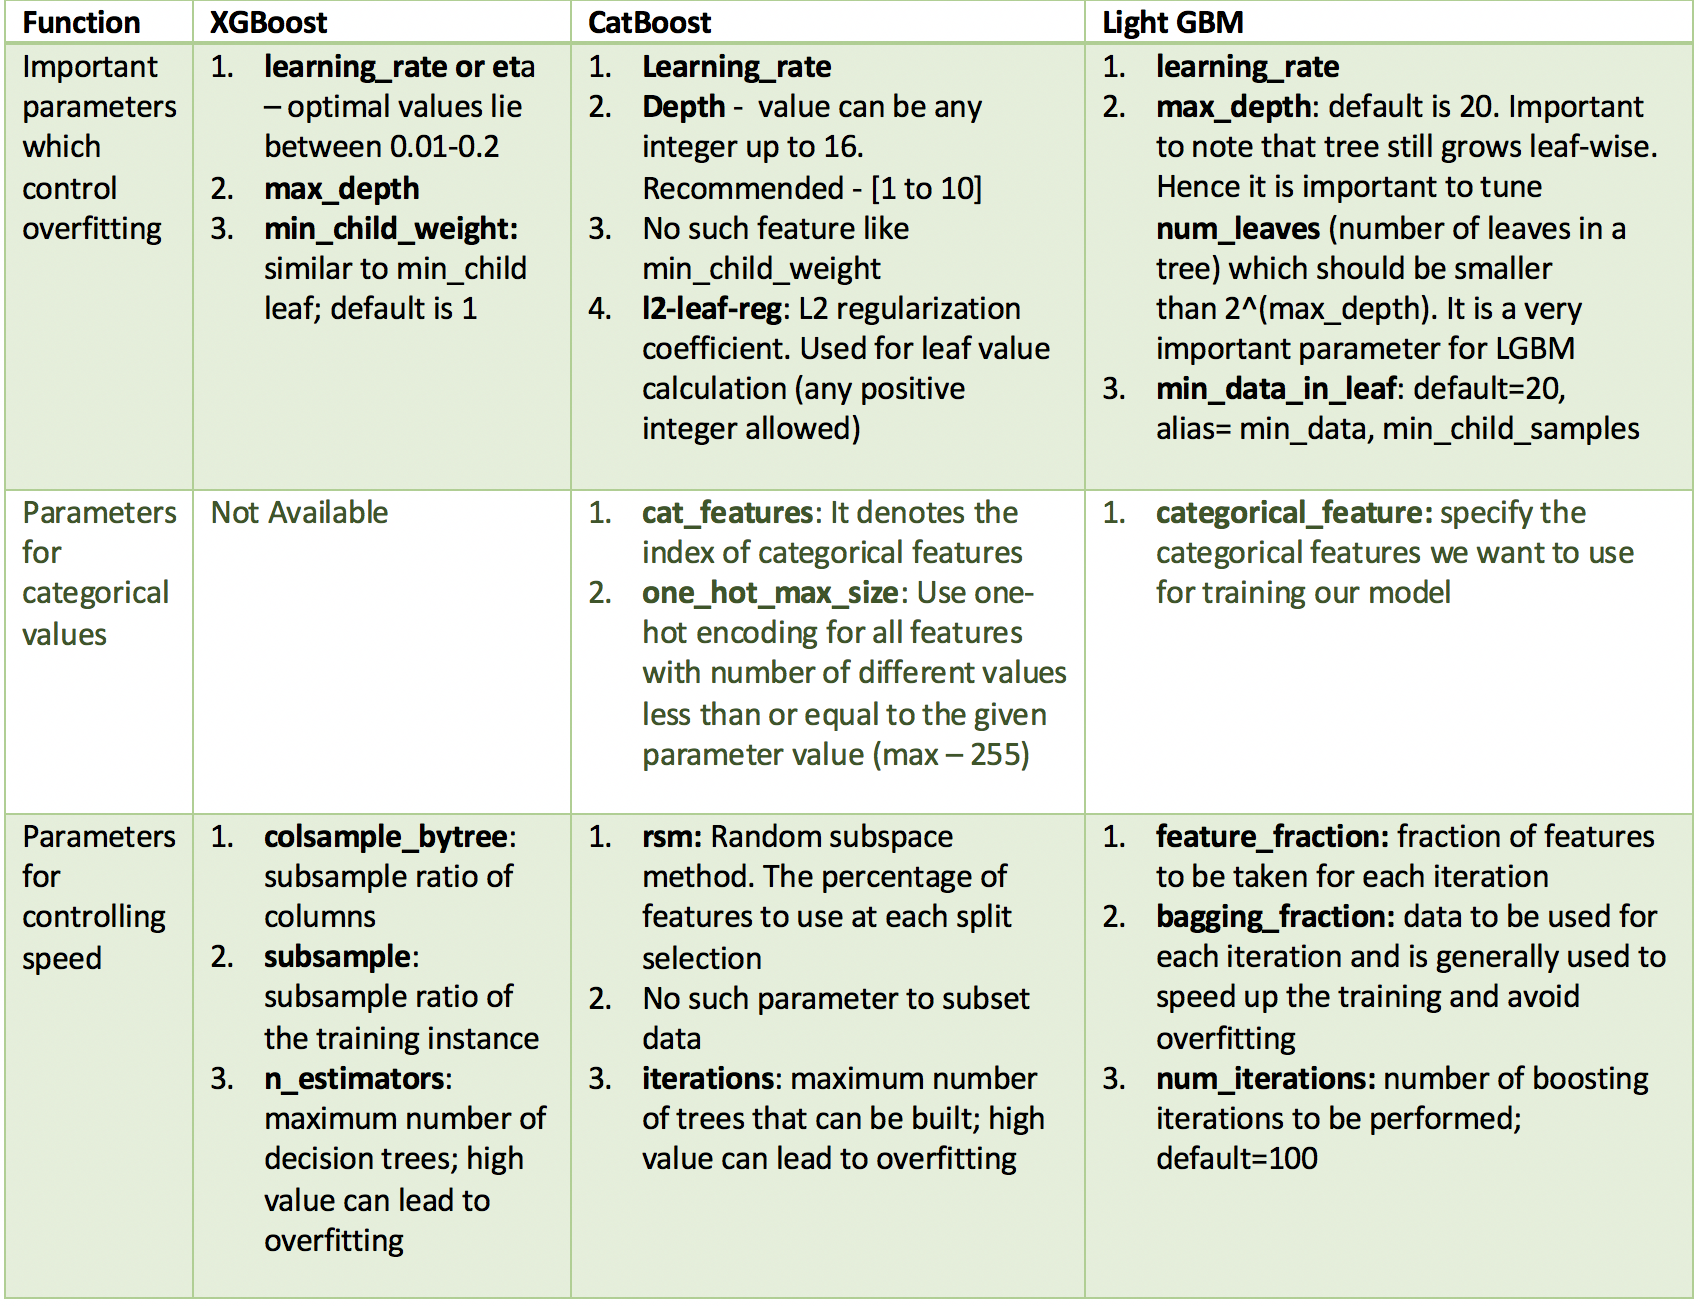